In [1]:
import numpy as np
import pandas as pd
from fastai.vision import *

In [2]:
path = Path('/notebooks'); print(path)
data_path = path
labels = pd.read_csv('/notebooks/train_labels.csv')
work_path = path/'models'

/notebooks


In [3]:
labels.rename(columns={'id': 'name'})
labels['id']='train/'+labels['id']+'.tif'

In [4]:
data = ImageDataBunch.from_df(data_path,
                              labels,
                              #test='test',
                              ds_tfms=get_transforms(do_flip=True,
                                                    flip_vert=True,
                                                    max_lighting=0.1,
                                                    max_warp=0.),
                              size=64).normalize(imagenet_stats)

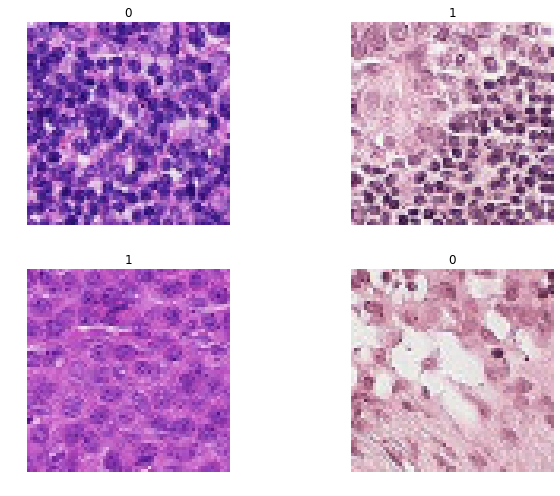

In [5]:
data.show_batch(2, figsize=(10,7))

In [6]:
data_more_lightning = ImageDataBunch.from_df(data_path,
                              labels,
                              #test='test',
                              ds_tfms=get_transforms(do_flip=True,
                                                    flip_vert=True,
                                                    max_lighting=0.5,
                                                    max_warp=0.),
                              size=64).normalize(imagenet_stats)

In [7]:
data_more_zoom = ImageDataBunch.from_df(data_path,
                              labels,
                              #test='test',
                              ds_tfms=get_transforms(do_flip=True,
                                                    flip_vert=True,
                                                    max_lighting=0.1,
                                                    max_warp=0.,
                                                    max_zoom=1.8),
                              size=64).normalize(imagenet_stats)

In [8]:
def getLearner(data, arch, opt, loss):
    return cnn_learner(data,
                       arch,
                       opt_func = opt,
                       loss_func = loss,
                       metrics=[accuracy, AUROC()],
                       model_dir=work_path)

In [9]:
arch = models.densenet169
opt = optim.Adam
loss = nn.CrossEntropyLoss()

learn = getLearner(data, arch, opt, loss)

learn.fit_one_cycle(3, slice(1e-02), wd=0.01)

Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /root/.cache/torch/checkpoints/densenet169-b2777c0a.pth


epoch,train_loss,valid_loss,accuracy,auroc,time
0,0.237733,0.207900,0.922441,0.972523,07:21
1,0.194645,0.162611,0.939393,0.982360,07:21
2,0.155736,0.143400,0.946506,0.986697,07:22


In [10]:
arch = models.densenet169
opt = optim.Adam
loss = nn.CrossEntropyLoss()

learn = getLearner(data_more_lightning, arch, opt, loss)

learn.fit_one_cycle(3, slice(1e-02), wd=0.01)

epoch,train_loss,valid_loss,accuracy,auroc,time
0,0.283901,0.232434,0.907624,0.967329,07:20
1,0.219717,0.184286,0.928804,0.977359,07:23
2,0.193489,0.163342,0.938234,0.982124,07:24


In [11]:
arch = models.densenet169
opt = optim.Adam
loss = nn.CrossEntropyLoss()

learn = getLearner(data_more_zoom, arch, opt, loss)

learn.fit_one_cycle(3, slice(1e-02), wd=0.01)

epoch,train_loss,valid_loss,accuracy,auroc,time
0,0.269352,0.254714,0.898034,0.965997,07:33
1,0.232745,0.188234,0.928531,0.977720,07:30
2,0.199563,0.163186,0.937598,0.982026,07:25
